In [1]:
import pandas as pd
import jieba
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号


In [3]:
dataframes = []
output_path = '21-23信息科学部.xlsx'
excel_paths = ['2021信息科学部.xls', '2022信息科学部.xlsx', '2023年信息科学部.xlsx']

for path in excel_paths:
    df = pd.read_excel(path)
    dataframes.append(df)

merged_df = pd.concat(dataframes, ignore_index=True)
merged_df.to_excel(output_path, index=False)


In [4]:
df_all = pd.read_excel(output_path)

In [15]:
jieba.load_userdict('personal_dict.txt')


In [62]:
text = ' '.join(df_all[df_all.columns[1]].dropna().astype(str).values)  # 将所有单元格内容合并为一个字符串
words = jieba.lcut(text)

ban_words = [' ', '基于', '的', '研究', '面向', '和', '与', '下', '关键技术', '及', '及其', '多', '中', '-', ':',
             '—', '在', '对', '大', '；', '：', '、', '/', '高', '自', '非', '可', '方法', '机制', '', '识别', '模型', '预测', '技术',
             '应用', '数据', '学习', '深度', '算法', '网络', '优化', '系统', '分析', '构建', '环境', '建模', '特征', '结构', '机理', '评估',
             '复杂', '设计', '功能', '适应','隐私', '智能', '理论', '协同', '驱动','控制','信息','辅助','知识','场景','风险','多源','计算','调控',
             '神经','融合', '目标', '图像', '成像', '超', '高效', '通信', '器件','表面','光纤','集成','性能', '跨','阵列','激光','传感器','特性',
             '光谱','传输','低','信号','联网','问题','钙钛矿','赫兹','光','光学','材料','柔性','太','行为','芯片','体','一体化','光子','光电','量子','传感','大规模','耦合','异质','图',
             '异构','混合','语义','过程','约束','雷达','纳米','资源','模式','定位','微','全','不','效应','样本','型','状态','新型']

# filtered_words = words
filtered_words = [word for word in words if word not in ban_words]
# for i, word in enumerate(filtered_words):
#     if word == '脑':
#         filtered_words[i] = '类脑'
#     if word == '图':
#         filtered_words[i] = '图网络'



In [63]:
counter = Counter(filtered_words)
most_common_words = counter.most_common(30)


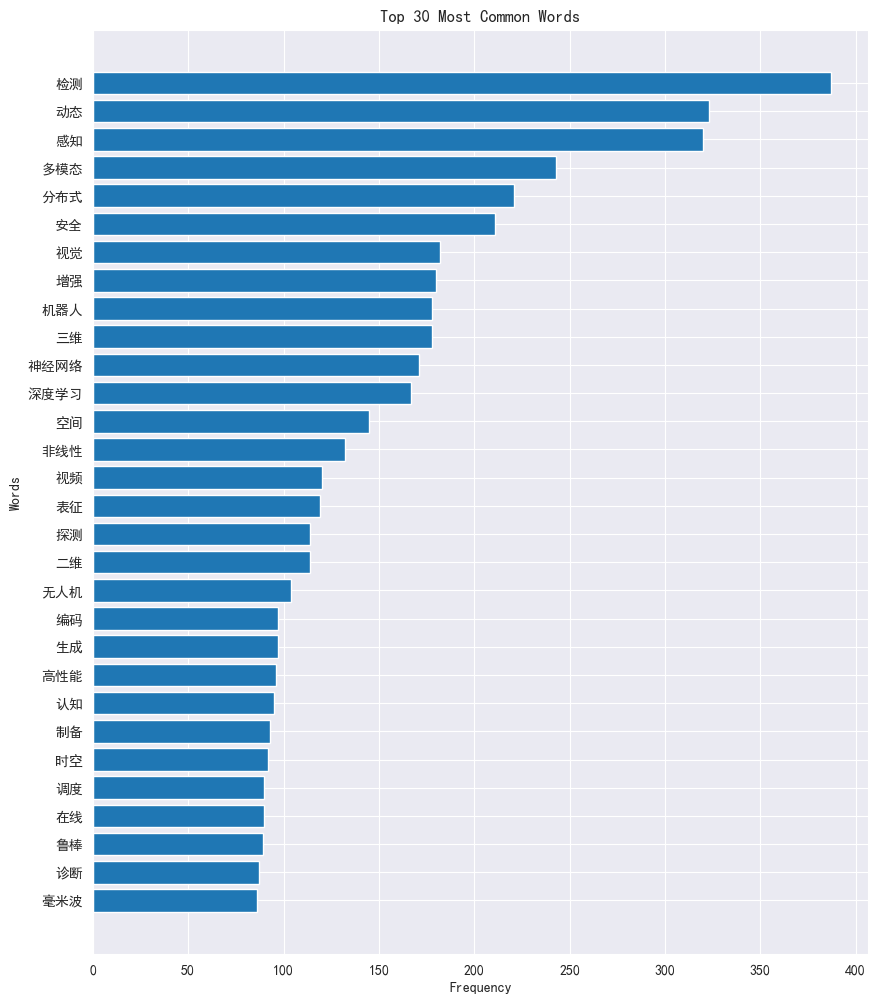

In [64]:
words, frequencies = zip(*most_common_words)
plt.figure(figsize=(10, 12))
plt.barh(words, frequencies)
plt.title('Top 30 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()  # 颠倒y轴，让最高的条在上面
plt.show()

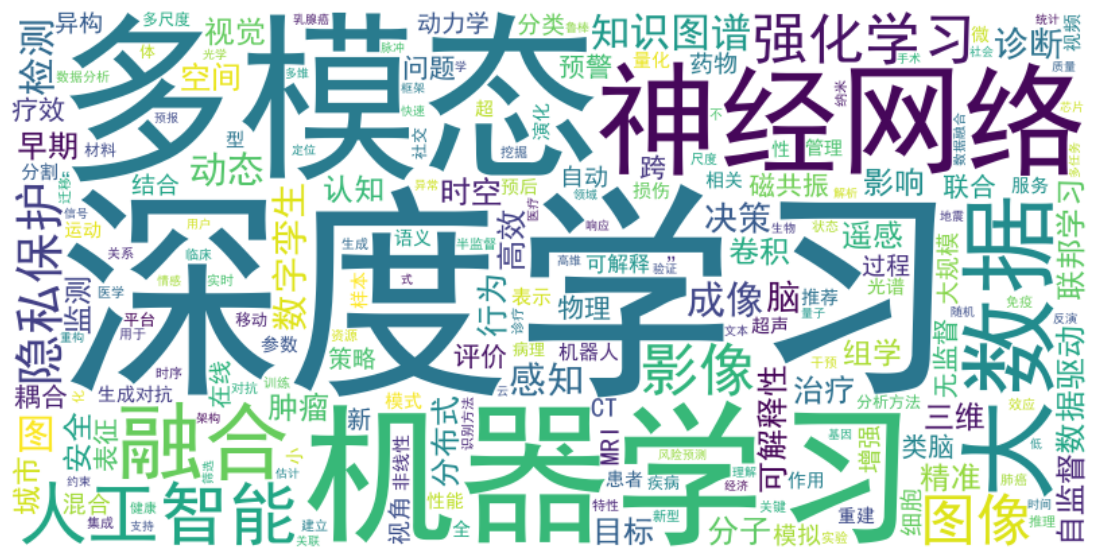

In [70]:
wordcloud = WordCloud(font_path='simhei.ttf', width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(counter)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 关闭坐标轴
plt.show()

In [53]:
words

('深度学习',
 '多模态',
 '机器学习',
 '神经网络',
 '大数据',
 '融合',
 '智能',
 '理论',
 '人工智能',
 '影像',
 '强化学习',
 '图像',
 '隐私保护',
 '知识图谱',
 '图',
 '协同',
 '检测',
 '成像',
 '数字孪生',
 '感知',
 '驱动',
 '动态',
 '计算',
 '控制',
 '信息',
 '辅助',
 '诊断',
 '决策',
 '知识',
 '场景')